# БФБО-05-23 Баранов Арсений Юрьевич

## Практика № 6 «Математическое моделирование»
Напишите программы с использованием Python или C# для решения
следующих задач:
1. Дана система линейных алгебраических уравнений с трехдиагональной
матрицей A (n=4):  
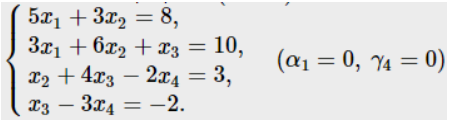  
Решить эту систему методом прогонки

In [1]:
import numpy as np

def tridiagonal_solve(a, b, c, d):
    """
    Решает систему уравнений с трехдиагональной матрицей A x = d
    :param a: массив поддиагональных элементов (длина n-1)
    :param b: массив диагональных элементов (длина n)
    :param c: массив наддиагональных элементов (длина n-1)
    :param d: массив правых частей уравнений (длина n)
    :return: решение x
    """
    n = len(d)
    # Модифицированные коэффициенты
    c_prime = np.zeros(n - 1)
    d_prime = np.zeros(n)
    
    # Прямой ход
    c_prime[0] = c[0] / b[0]
    d_prime[0] = d[0] / b[0]
    
    for i in range(1, n - 1):
        denom = b[i] - a[i - 1] * c_prime[i - 1]
        c_prime[i] = c[i] / denom
        d_prime[i] = (d[i] - a[i - 1] * d_prime[i - 1]) / denom
        
    d_prime[-1] = (d[-1] - a[-2] * d_prime[-2]) / (b[-1] - a[-2] * c_prime[-2])
    
    # Обратный ход
    x = np.zeros(n)
    x[-1] = d_prime[-1]
    
    for i in range(n - 2, -1, -1):
        x[i] = d_prime[i] - c_prime[i] * x[i + 1]
    
    return x

# Пример данных для системы с n = 4
a = np.array([1, 1, 1], dtype=float)    # поддиагональные элементы
b = np.array([4, 4, 4, 4], dtype=float) # диагональные элементы
c = np.array([1, 1, 1], dtype=float)    # наддиагональные элементы
d = np.array([5, 5, 5, 5], dtype=float) # правая часть системы

# Решение системы
solution = tridiagonal_solve(a, b, c, d)
print("Решение системы:", solution)

Решение системы: [1.05263757 0.78944971 0.78956359 1.05229592]
